In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Data_Cleaned/data.csv')
data2=pd.read_csv('Data_Cleaned/data2.csv')

In [3]:
#checking
display(data.head())
display(data.info())
display(data2.head())
display(data2.info())

,Unnamed: 0,client_id,sex,birth,id_prod,date,session_id,price,categ
0,0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0
1,1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0
2,2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1
3,3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1
4,4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336837 entries, 0 to 336836
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336837 non-null  int64  
 1   client_id   336837 non-null  object 
 2   sex         336837 non-null  object 
 3   birth       336837 non-null  int64  
 4   id_prod     336837 non-null  object 
 5   date        336816 non-null  object 
 6   session_id  336816 non-null  object 
 7   price       336837 non-null  float64
 8   categ       336837 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 23.1+ MB


None

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313672 entries, 0 to 313671
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   313672 non-null  object 
 1   sex         313672 non-null  object 
 2   birth       313672 non-null  int64  
 3   id_prod     313672 non-null  object 
 4   date        313651 non-null  object 
 5   session_id  313651 non-null  object 
 6   price       313672 non-null  float64
 7   categ       313672 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 19.1+ MB


None

In [4]:
#Converting categorires to strings date column to date value again
data['categ'] = data['categ'].astype(str)
data2['categ'] = data2['categ'].astype(str)

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S.%f')
data2['date'] = pd.to_datetime(data2['date'], format='%Y-%m-%d %H:%M:%S.%f')


# Task 2: Data Analysis

Sometimes, I will use data, and sometimes data2 (without the outliers).

When will I use data: When we are interested simply in data about the item that was purchased, without any information about the type of person who purchased it, like price and time of purchase. 
Why? because it is also in our interest to provide these partners the type of product that their customers buy, becuase they buy such a big share of our purchased books.

I will use data2 when the question is about the clients age or sex. 
Why? Because most likely the outlier clients aren't really purchasing it for themselves, which means they don't truly just represent the purchases of one person and therefore their sex and age becomes irrelevant in the statistics and they can scew the result.

## Indicators of central tendency and dispersion

In [5]:
data['price'].describe()

count    336837.000000
mean         17.213602
std          17.852608
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [6]:
#let's make an age column, to make the analysis clearer
data['age']=2023 - data['birth'] 
data2['age']=2023- data2['birth']

In [7]:
data2['age'].describe()

count    313672.000000
mean         45.206126
std          13.797559
min          19.000000
25%          36.000000
50%          44.000000
75%          52.000000
max          94.000000
Name: age, dtype: float64

Here we can see that our clients range from 19-94 years olds, but majority fall within 36-52.

In [8]:
data.groupby(['categ'])['sex'].value_counts()

categ  sex
0      m      105683
       f      103846
1      f       55480
       m       54276
2      m        9292
       f        8260
Name: count, dtype: int64

In [9]:
data2.groupby(['categ'])['sex'].value_counts()

categ  sex
0      f      101206
       m       94064
1      f       53785
       m       48861
2      f        8122
       m        7634
Name: count, dtype: int64

Here we can see that if we look at data, we have more or less we have an equal amount of females and males purchasing for each category. But if we exclude the outliers and look at data2, it becomes obvious that majority of the clients are female.

### Graphs of age, prices, categories

In [10]:
# Defining the colours for each category 
palette = {'0': 'lightseagreen', '1': 'palevioletred', '2': 'sandybrown', 'f': 'pink', 'm': 'palegoldenrod'}


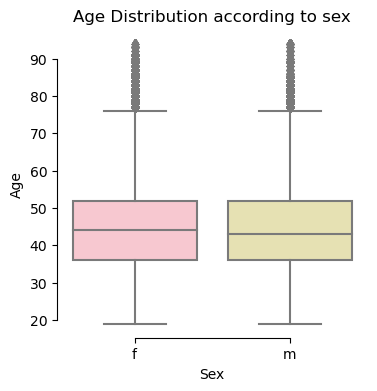

In [11]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='sex', y='age', data=data2, palette = palette)
sns.despine(trim = True)
plt.title('Age Distribution according to sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

C:\Users\Stefania\.anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


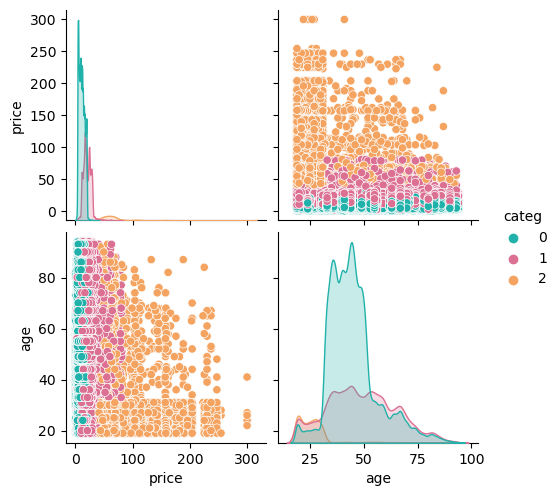

In [12]:
sns.pairplot(data2, hue='categ', vars=['price','age'], height=2.5, palette = palette) 
plt.show()

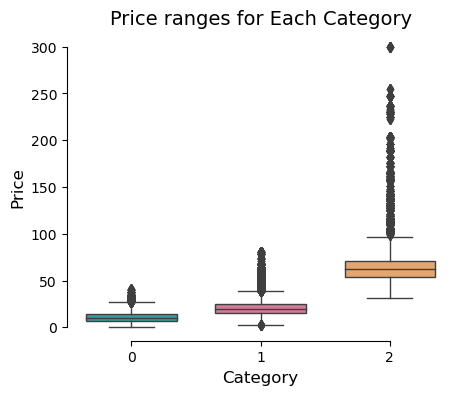

In [13]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='categ', y='price', data=data, palette = palette, linewidth = 1, width = 0.7)
sns.despine(trim = True)
plt.title('Price ranges for Each Category', fontsize = 14)
plt.xlabel('Category',fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

In [14]:
# lets see which category has the most sales in terms of items.
data['categ'].value_counts()

categ
0    209529
1    109756
2     17552
Name: count, dtype: int64

,categ,price
0,0,2.230819e+06
1,1,2.247888e+06
2,2,1.319471e+06


Text(0.5, 0, 'Category')

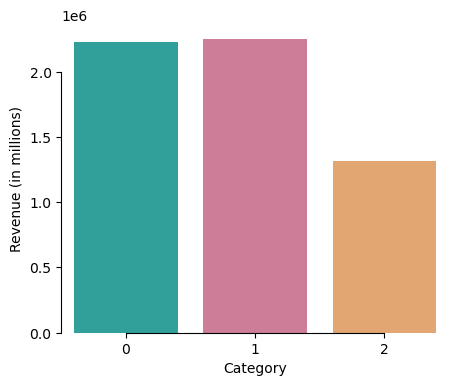

In [15]:
# what is our most revenue generating category?
data_rev_by_cat = data.groupby('categ')['price'].sum().reset_index()
display(data_rev_by_cat)

#plot
plt.figure(figsize=(5, 4))
sns.barplot(x='categ', y='price', data=data_rev_by_cat, palette=palette)
sns.despine(trim = True)
plt.ylabel('Revenue (in millions)')
plt.xlabel('Category')

Majority of our revenues come from category 0 and 1.

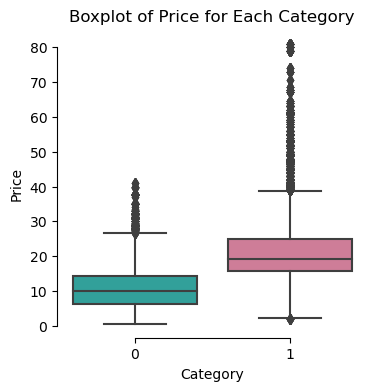

In [16]:
#since most our revenues are 0 and 1 category products, lets observe their price distribution closer. 
data_cat_01 = data[(data['categ'] == '0') | (data['categ'] == '1')]

plt.figure(figsize=(4, 4))
sns.boxplot(x='categ', y='price', data=data_cat_01, palette=palette)
sns.despine(trim = True)
plt.title('Boxplot of Price for Each Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

Lets see which year there were more revenues:

In [17]:
data.head()
data['year'] = data['date'].dt.year.fillna(0).astype(int)

#Lets make a new table without missing date values.
data_date = data.dropna(subset=['date'])
data_date.head()

,Unnamed: 0,client_id,sex,birth,id_prod,date,session_id,price,categ,age,year
0,0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,56,2021
1,1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,56,2021
2,2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,56,2022
3,3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,56,2021
4,4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,56,2021


In [18]:
sales_annual = data_date.groupby(data['year'])['price'].sum().reset_index().astype(int)
sales_annual.rename(columns={'price': 'revenue'}, inplace=True)
display(sales_annual)


,year,revenue
0,2021,4741807
1,2022,1055866


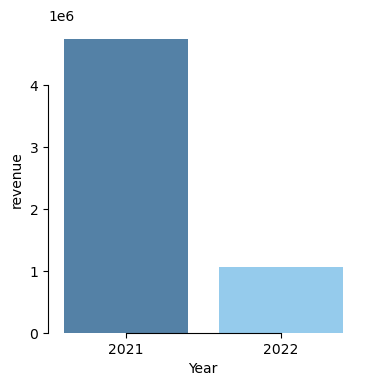

In [19]:
# Create a bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='year', y='revenue', data=sales_annual, palette=['steelblue','lightskyblue'])
sns.despine(trim = True)
plt.xlabel('Year')
plt.ylabel('revenue')
plt.show()

In [20]:
data.head()

,Unnamed: 0,client_id,sex,birth,id_prod,date,session_id,price,categ,age,year
0,0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,56,2021
1,1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,56,2021
2,2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,56,2022
3,3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,56,2021
4,4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,56,2021


Monthly Sales

In [21]:
# Create a new column 'month' from the 'date' column
data['month'] = data['date'].dt.to_period("M")

# Group by 'month' and 'categ', sum the 'price' column, then reset the index
monthly_rev = data.groupby(['month', 'categ'])['price'].sum().reset_index()

# Use pivot to reshape the DataFrame
pivot_monthly_rev = monthly_rev.pivot(index='month', columns='categ', values='price').reset_index()

# Rename the columns
pivot_monthly_rev.columns.name = None  # Remove the 'categ' label
pivot_monthly_rev.columns = ['month', '0', '1', '2']

#To make the graph nicer, I converted the values in thousands.
pivot_monthly_rev['0'] = pivot_monthly_rev['0']/1000
pivot_monthly_rev['1'] = pivot_monthly_rev['1']/1000
pivot_monthly_rev['2'] = pivot_monthly_rev['2']/1000

# Display the result
pivot_monthly_rev.head()


,month,0,1,2
0,2021-03,193.662201,186.97417,98.77148
1,2021-04,205.308726,156.13835,111.68270
2,2021-05,196.200135,165.89340,127.35959
3,2021-06,167.960868,189.16204,124.20956
4,2021-07,144.754507,188.52327,147.66347


<Figure size 1000x400 with 0 Axes>

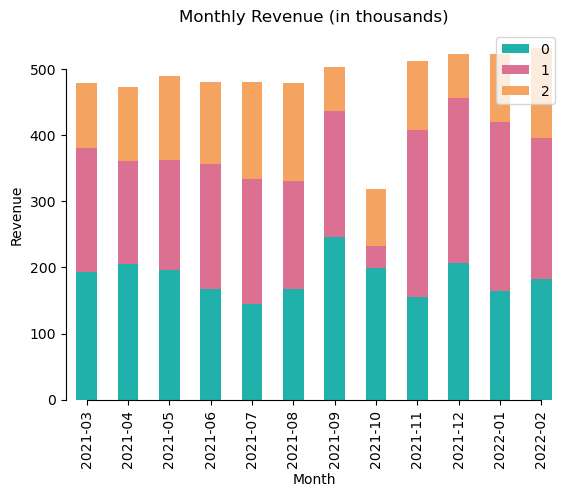

In [22]:
plt.figure(figsize=(10, 4))
pivot_monthly_rev.plot(kind='bar', x='month', y = ['0','1','2'], stacked = True, color = palette)  
sns.despine(trim = True)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue (in thousands)')
plt.show()

## Concentration analysis: Lorenz curve

Lets see how equally distributed our sales are in terms of clients. Do we have clients who are regular customers and who spend way more than other clients at our shop?

In [23]:
#What is the total revenue? 
data['price'].sum()

5798178.183308233

### With Outliers

Grouped by client and calculated the cumulative purchase vlaue for each client


In [24]:
data_cumulative = pd.DataFrame(data.groupby('client_id')['price'].sum().sort_values(ascending=True))
data_cumulative.rename(columns={'price': 'payed/client'}, inplace=True)
data_cumulative['payed'] = data_cumulative['payed/client'].cumsum()
data_cumulative['payed_pc'] = data_cumulative ['payed']/(data_cumulative['payed/client'].sum())*100
data_cumulative['client_number']= np.arange(1,len(data_cumulative)+1)
data_cumulative['client_pc']=data_cumulative['client_number']/len(data_cumulative)*100

#lets see how the table looks
display(data_cumulative.head())
#Lets check if the percentage adds up to 100%
data_cumulative.iloc[-1, :]

,payed/client,payed,payed_pc,client_number,client_pc
client_id,,,,,
c_8140,4.15,4.15,0.000072,1,0.011600
c_8114,4.99,9.14,0.000158,2,0.023199
c_1675,5.57,14.71,0.000254,3,0.034799
c_890,6.08,20.79,0.000359,4,0.046398
c_8351,6.31,27.10,0.000467,5,0.057998


payed/client     1.620073e+05
payed            5.798178e+06
payed_pc         1.000000e+02
client_number    8.621000e+03
client_pc        1.000000e+02
Name: c_1609, dtype: float64

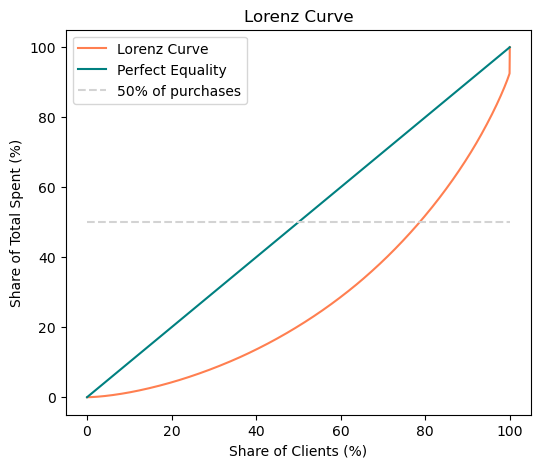

In [25]:
# Plot the Lorenz curve
fig= plt.figure(figsize=(6,5))
sns.lineplot (data= data_cumulative, x='client_pc', y='payed_pc', label='Lorenz Curve', color = 'coral')

# Add labels and title
plt.xlabel('Share of Clients (%)')
plt.ylabel('Share of Total Spent (%)')
plt.title('Lorenz Curve')

## line plot of equality
sns.lineplot (x=[0, 100], y= [0, data_cumulative['payed_pc'].max()], label = 'Perfect Equality', color = 'teal')

## line plot at 50% of 
sns.lineplot (x=[0,100], y = [50, 50], label = '50% of purchases',linestyle='dashed', color='lightgray')
# Display the plot
plt.legend()
plt.show()

In [26]:
# Calculating the cumulative percentage of the total sum of prices
cum_percentage = data_cumulative['payed/client'] / data_cumulative['payed'].max()


# Gini Coefficient

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.values.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

gini_coefficient = gini(cum_percentage)

print("Gini Coefficient:", gini_coefficient)            

Gini Coefficient: 0.4405768941897376


It seems like that indeed we have regular customers and some customers who buy disproportionally more.
The graph shows that 50% of the products worth is being bought by around 80% of the clients. which means that the other half of the 50% is bought up by about 20% of the customers.

### Without Outliers

Let's see if eliminating the outliers makes a big difference.

In [27]:
data_cumulative = pd.DataFrame(data2.groupby('client_id')['price'].sum().sort_values(ascending=True))
data_cumulative.rename(columns={'price': 'payed/client'}, inplace=True)
data_cumulative['payed'] = data_cumulative['payed/client'].cumsum()
data_cumulative['payed_pc'] = data_cumulative ['payed']/(data_cumulative['payed/client'].sum())*100
data_cumulative['client_number']= np.arange(1,len(data_cumulative)+1)
data_cumulative['client_pc']=data_cumulative['client_number']/len(data_cumulative)*100

#lets see how the table looks
display(data_cumulative.head())
#Lets check if the percentage adds up to 100%
data_cumulative.iloc[-1, :]

,payed/client,payed,payed_pc,client_number,client_pc
client_id,,,,,
c_8140,4.15,4.15,0.000077,1,0.011605
c_8114,4.99,9.14,0.000170,2,0.023210
c_1675,5.57,14.71,0.000274,3,0.034815
c_890,6.08,20.79,0.000388,4,0.046420
c_8351,6.31,27.10,0.000505,5,0.058025


payed/client     2.564250e+03
payed            5.364231e+06
payed_pc         1.000000e+02
client_number    8.617000e+03
client_pc        1.000000e+02
Name: c_7959, dtype: float64

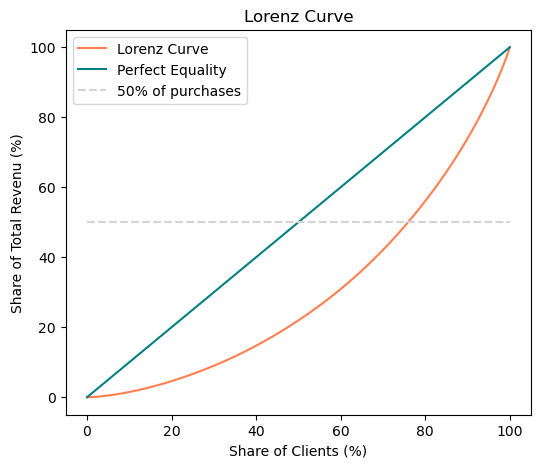

In [28]:
# Plot the Lorenz curve
fig= plt.figure(figsize=(6,5))
sns.lineplot (data= data_cumulative, x='client_pc', y='payed_pc', label='Lorenz Curve', color = 'coral')

# Add labels and title
plt.xlabel('Share of Clients (%)')
plt.ylabel('Share of Total Revenu (%)')
plt.title('Lorenz Curve')

## line plot of equality
sns.lineplot (x=[0, 100], y= [0, data_cumulative['payed_pc'].max()], label = 'Perfect Equality', color= 'teal')

## line plot at 50% of 
sns.lineplot (x=[0,100], y = [50, 50], label = '50% of purchases',linestyle='dashed', color='lightgray')
# Display the plot
plt.legend()
plt.show()

In [29]:
# Calculating the cumulative percentage of the total sum of prices
cum_percentage = data_cumulative['payed/client'] / data_cumulative['payed'].max()


# Gini Coefficient

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.values.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

gini_coefficient = gini(cum_percentage)

print("Gini Coefficient:", gini_coefficient) 

Gini Coefficient: 0.39606772159414716


Seems like eliminating the outliers did make the graph and the gini coefficient more equal. 

# Correlation Analyses

## Gender-Category: Chi-squared

In [30]:
#we will use data2, to eliminate outliers 
data2.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,56
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,56
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,56
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,56
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,56


In [31]:
#should I do this now or also in the beginning of the file?
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data2['sex'], data2['categ'])
display(contingency_table)

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print('Chi-squared:', chi2)
print('P-value:', p)


categ,0,1,2
sex,,,
f,101206,53785,8122
m,94064,48861,7634


Chi-squared: 10.112077144783356
P-value: 0.006370746843508676


H0: females and males buy equally from each category

The null hypothesis is rejected in this case because the chi_squared value is significant and the p-value is also below 0.05. This means that there is a difference in buying habits. Specifically here we can see that females buy more from all categories.

Lets make a bar chart to represent these differences visually

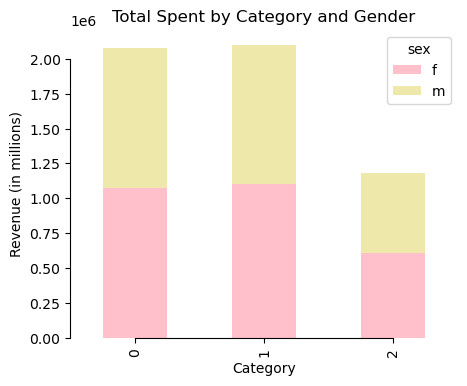

In [32]:

grouped_data = data2.groupby(['sex', 'categ'])['price'].sum().unstack()
grouped_data = grouped_data.T

# Plotting 
grouped_data.plot(kind='bar', stacked=True, figsize=(5, 4), color= palette)
sns.despine(trim = True)
plt.xlabel('Category')
plt.ylabel('Revenue (in millions)')
plt.title('Total Spent by Category and Gender')
plt.show()


The graph above shows that altough there are significant differences between the buying patterns of women and men when it comes to categories, the difference is too small for a grocery store to acutally make money from it so it is not so relevant for our case.

## Gender- Price: ANOVA

In [33]:
#Using data2 to exclude outliers
from scipy.stats import f_oneway

result = f_oneway(data2[data2['sex'] == 'f']['price'], data2[data2['sex'] == 'm']['price'])

#Displaying the result
result

F_onewayResult(statistic=0.2908705522379753, pvalue=0.5896635820918001)

C:\Users\Stefania\AppData\Local\Temp\ipykernel_37400\2607048401.py:13: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), color = palette)


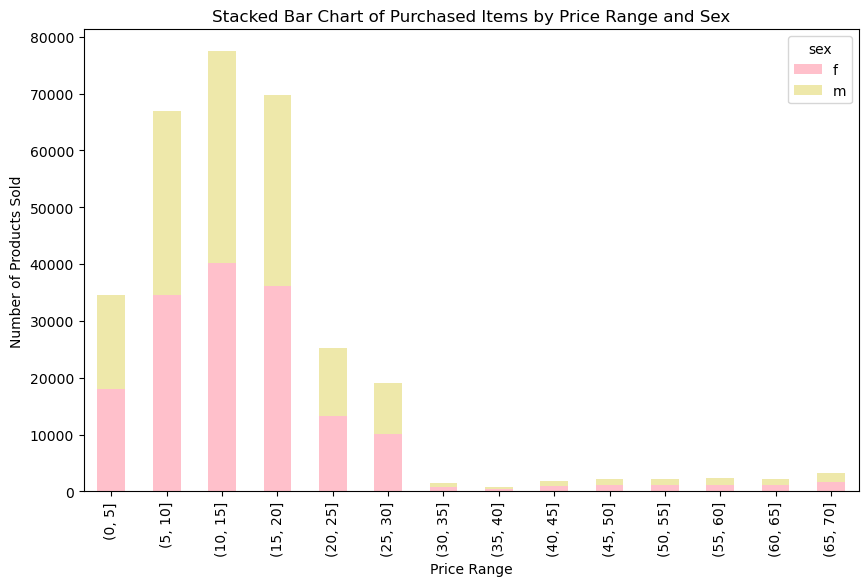

In [34]:
#Majority of sales occur within the 0-30 price range, so here is histogram showing the gender distribution within
#this range

price_ranges = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

# Create a new column 'price_range' based on the price ranges
data2['price_range'] = pd.cut(data['price'], bins=price_ranges)

# Group by 'price_range' and 'sex', then count the occurrences
grouped_data = data2.groupby(['price_range', 'sex']).size().unstack()

# Plot stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), color = palette)
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Products Sold')
ax.set_title('Stacked Bar Chart of Purchased Items by Price Range and Sex')

# Display the plot
plt.show()

Seems like there is no significant differences in behaviours of different sexes when looking at the price of a product purchased. Let's see if this changes if we include the outliers.

Let's see if this changes if we include the outliers.

In [35]:
# Using data to include outliers
from scipy.stats import f_oneway

result = f_oneway(data[data['sex'] == 'f']['price'], data[data['sex'] == 'm']['price'])

#Displaying the result
result

F_onewayResult(statistic=22.79684522429518, pvalue=1.8013649887262737e-06)

The F-statistic is 22.8, which is suggesting that there are significant differences in the 'price' variable based on the 'sex' variable.
The p-value is very small, 1.8 * 10^6, which is below 0.05, which means that this test is significant.


Similarly to the Gender-Category correlation we can see that although the differences in buying patterns are significant. The company would not be able to make money off of this because these differences aren't big enough.

## Age - Purchase Frequency

In [36]:
data.head()

,Unnamed: 0,client_id,sex,birth,id_prod,date,session_id,price,categ,age,year,month
0,0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,56,2021,2021-03
1,1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,56,2021,2021-09
2,2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,56,2022,2022-01
3,3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,56,2021,2021-07
4,4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,56,2021,2021-11


In [37]:
monthly_count = data.groupby(['month', 'age'])['client_id'].count().reset_index()
monthly_count.rename(columns={'client_id': 'count'},inplace = True)
monthly_count.head()

,month,age,count
0,2021-03,19,596
1,2021-03,20,207
2,2021-03,21,136
3,2021-03,22,170
4,2021-03,23,187


In [38]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(monthly_count['age'],monthly_count['count'])

# Display the results
print('Pearson correlation coefficient', correlation_coefficient)
print('P-value:', p_value) 

Pearson correlation coefficient -0.5192982498040013
P-value: 4.042314146619045e-64


In [39]:
#for the graph I have to calculate the average monthly purchase. 

monthly_count_avg=monthly_count.groupby(['month','age'])['count'].mean().reset_index()

monthly_count_avg

,month,age,count
0,2021-03,19,596.0
1,2021-03,20,207.0
2,2021-03,21,136.0
3,2021-03,22,170.0
4,2021-03,23,187.0
...,...,...,...
907,2022-02,90,29.0
908,2022-02,91,15.0
909,2022-02,92,9.0
910,2022-02,93,13.0


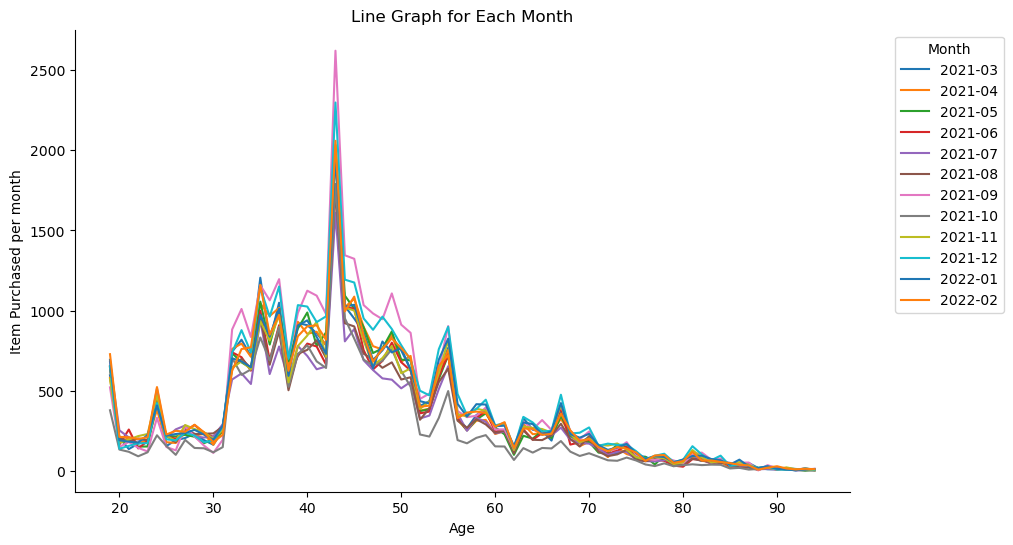

In [113]:
# Get unique months from the 'month' column
unique_months = monthly_count_avg['month'].unique()

# Create a single plot for all months
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Loop through each unique month and plot a line on the same graph
for month in unique_months:
    # Filter DataFrame for the current month
    monthly_data = monthly_count_avg[monthly_count_avg['month'] == month]
    
    # Plot a line for the current month
    sns.lineplot(x='age', y='count', data=monthly_data, label=month)

plt.title('Line Graph for Each Month')
sns.despine()
plt.xlabel('Age')
plt.ylabel('Item Purchased per month')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot
plt.show()

## Age-Basket total: Pierson correlation

Lets now observe if perhaps there are differences in purchasing behaviour between males and females?


In [41]:
data2.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,price_range
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,56,"(5, 10]"
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0,56,"(15, 20]"
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1,56,"(20, 25]"
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1,56,"(25, 30]"
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0,56,"(0, 5]"


Lets groupby session_id:

In [42]:
# we can see that originally we had over 336 thousand lines, representing each item.
data2['session_id'].count()

313651

In [43]:
# now we can see that we have almost 170 thousand lines representing the total  
data_s = data2.groupby(['session_id']).count()['id_prod']
data_age=data2.groupby('session_id').agg({'age':'first'})
display(data_s.head())
display(data_age.head())

# I have to merge the data_s and data_sex dataframes.

session_id
s_1        1
s_10       1
s_100      2
s_1000     4
s_10000    3
Name: id_prod, dtype: int64

,age
session_id,
s_1,56
s_10,53
s_100,45
s_1000,34
s_10000,34


In [44]:
data_s = pd.concat([data_s, data_age], axis=1)
data_s.head()

,id_prod,age
session_id,,
s_1,1,56
s_10,1,53
s_100,2,45
s_1000,4,34
s_10000,3,34


In [45]:
# mean basket size in terms of numbers
round(data_s['id_prod'].mean())

2

In [46]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(data_s['age'],data_s['id_prod'])

# Display the results
print('Pearson correlation coefficient', correlation_coefficient)
print('P-value:', p_value) 

Pearson correlation coefficient -0.19414590682787863
P-value: 0.0


According to the P value there are significant differencds in behaviours in terms of basket size and age. The negative correlation tells us that older people tend to purchase less items at the same time. Let's plot this to see this trend more clearly.

In [47]:
# for each age I exctracted the mean number of items in their basket.
data_s_mean = data_s.groupby('age')['id_prod'].mean()
data_s_mean = pd.DataFrame({'age': data_s_mean.index, 'id_prod': data_s_mean.values})
data_s_mean.head()

,age,id_prod
0,19,1.757054
1,20,1.724901
2,21,1.742947
3,22,1.732310
4,23,1.843220


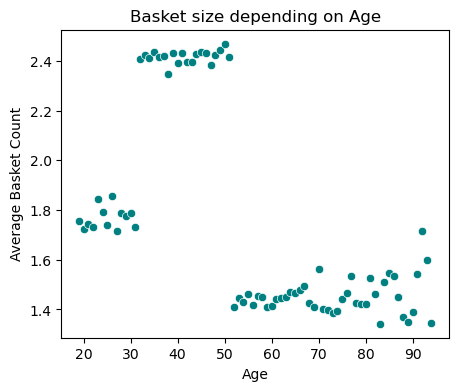

In [48]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='age', y='id_prod', data=data_s_mean, color = 'teal')
plt.title('Basket size depending on Age')
plt.xlabel('Age')
plt.ylabel('Average Basket Count')
plt.show()

The scatterplot shows us that there are very different behaviours depending on age. 

## Age - Price: Pierson correlation 

In [49]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(data2['age'],data2['price'])

# Display the results
print('Pearson correlation coefficient', correlation_coefficient)
print('P-value:', p_value) 


Pearson correlation coefficient -0.1990154688188922
P-value: 0.0


The correlation coefficient is -0.19, so negative, but it is also weak. The P value is 0 so the result is significant. This means that older clients purchase products that cost less on average. 

## Age-Total Spent

 Lets perform again a correlation analysis but this time with the total spent and age, instead of just the prices of products.

In [50]:
total_spent = data2.groupby('client_id').agg({'price': 'sum', 'age': 'first'}).reset_index()
total_spent.rename(columns={'price': 'total_spent'}, inplace=True)
total_spent.head()

,client_id,total_spent,age
0,c_1,300.65,68
1,c_10,586.18,67
2,c_100,222.87,31
3,c_1000,980.02,57
4,c_1001,1102.45,41


In [51]:
# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(total_spent['age'],total_spent['total_spent'])

# Display the results
print('Pearson correlation coefficient', correlation_coefficient)
print('P-value:', p_value) 

Pearson correlation coefficient -0.18848007589175292
P-value: 9.807471343074227e-70


Seems like the correlation is quite weak and but significant, lets plot this to find out more 

In [52]:
# I will average the total spent values for each age to avoid having too many points on my graph
total_spent_per_age=total_spent.groupby('age')['total_spent'].mean().reset_index()
total_spent_per_age.head()

,age,total_spent
0,19,671.499886
1,20,606.064247
2,21,616.059293
3,22,668.735906
4,23,589.048286


C:\Users\Stefania\AppData\Local\Temp\ipykernel_37400\760396182.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=total_spent_per_age['age'], y=total_spent_per_age['total_spent'], s=50, palette = palette)


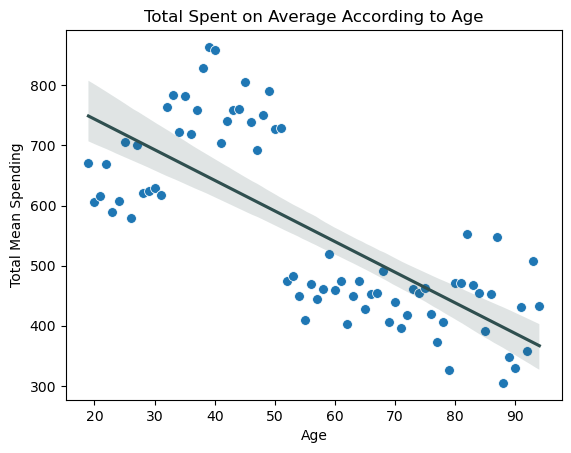

In [53]:
sns.scatterplot(x=total_spent_per_age['age'], y=total_spent_per_age['total_spent'], s=50, palette = palette)
sns.regplot(x=total_spent_per_age['age'], y=total_spent_per_age['total_spent'], scatter=False, line_kws={'color': 'darkslategray'})
plt.xlabel('Age')
plt.ylabel('Total Mean Spending')
plt.title('Total Spent on Average According to Age')
plt.show()

As we can see, there is a sudden drop in total spent at the store for clients > 50. Lets dive futher into the details by observing this phenomena by category.

## Age - Category: ANOVA

In [54]:
age_cat_result = f_oneway(
    data2[data2['categ'] == '0']['age'],
    data2[data2['categ'] == '1']['age'],
    data2[data2['categ'] == '2']['age'],

)

print(age_cat_result)

F_onewayResult(statistic=19930.694103615133, pvalue=0.0)


The test statistic is very large and the p value is 0. This means that the age correlates with the categories. We could also see this in the pearplot above.

I made a graph below to represent this, but I did it by looking at the total spent. 
I first grouped by client and category, and summed prices accordingly

I averaged it by age.

In [55]:
#I had to make a new dataframe because I wanted to groupby also by category to be able to plot based on category.
#I grouped by client and category and then calculated the total spent per person for each category
total_spent2 = data2.groupby(['client_id','categ']).agg({'price': 'sum', 'age': 'first'}).reset_index()
total_spent2.rename(columns={'price': 'total_spent'}, inplace=True)
total_spent2.head()


,client_id,categ,total_spent,age
0,c_1,0,174.20,68
1,c_1,1,71.58,68
2,c_1,2,54.87,68
3,c_10,0,124.92,67
4,c_10,1,391.27,67


In [56]:
# I now averaged it by age, so that I don't have so many datapoints when plotting and it gives a clearer pattern.
total_spent2_per_age=total_spent2.groupby(['age','categ'])['total_spent'].mean()
total_spent2_per_age = pd.DataFrame({
    'age': total_spent2_per_age.index.get_level_values('age'),
    'categ': total_spent2_per_age.index.get_level_values('categ'),
    'total_spent': total_spent2_per_age.values
})

total_spent2_per_age.head()

,age,categ,total_spent
0,19,0,57.021909
1,19,1,132.550884
2,19,2,532.152530
3,20,0,55.908387
4,20,1,121.711884


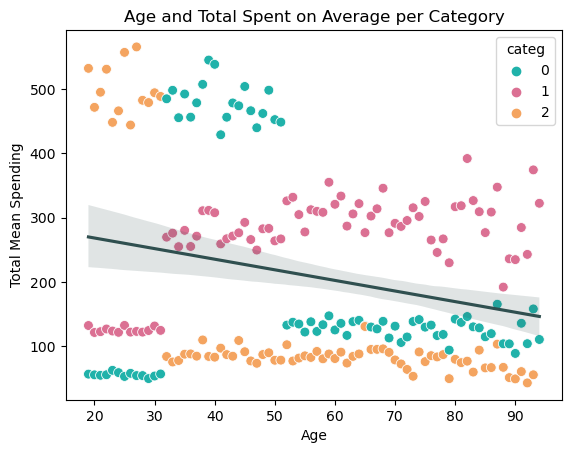

In [57]:
# Create scatter plot with regression line. I had to add hue argument to show categories
sns.scatterplot(x=total_spent2_per_age['age'], y=total_spent2_per_age['total_spent'], hue=total_spent2_per_age['categ'], s=50, palette = palette)
sns.regplot(x=total_spent2_per_age['age'], y=total_spent2_per_age['total_spent'], scatter=False, line_kws={'color': 'darkslategray'})
plt.xlabel('Age')
plt.ylabel('Total Mean Spending')
plt.title('Age and Total Spent on Average per Category')
plt.show()

The correlation is not strong because there are different clients per category, but the graph shows how people under <20 buy much more category 2 products that are high value, and people above >30 tend to buy more category 1 prodcts. 

# Adittional plots


## Revenues per category per age 

Plot shows the total spent for each category per age. This is different from the above graphs, because there the data was first grouped by client. That shows more, what is the total spending we should expect from X old client. 

These graphs show the total amount of revenue from each age group. It tells us, what is the amount of revenue we should expect at the end of the year from a certain age. 

I grouped by age and category and summed the price.


In [58]:
revenue_per_age = data2.groupby(['categ','age']).agg({'price': 'sum'}).sort_values(by='price', ascending=False).reset_index()
revenue_per_age.rename(columns={'price': 'revenue'}, inplace=True)
revenue_per_age.head()

,categ,age,revenue
0,2,19,220843.300000
1,0,35,101893.153656
2,0,44,101426.870969
3,0,45,100292.171454
4,2,27,97251.720000


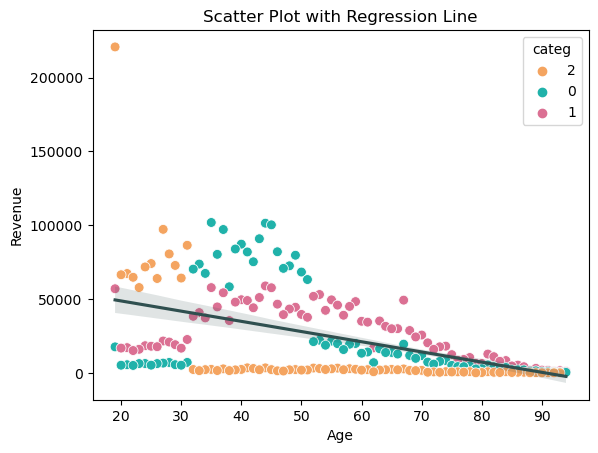

In [59]:
# Created a scatter plot with regression line. I had to add hue argument to show categories
sns.scatterplot(x=revenue_per_age['age'], y=revenue_per_age['revenue'], hue=revenue_per_age['categ'], s=50, palette = palette)
sns.regplot(x=revenue_per_age['age'], y=revenue_per_age['revenue'], scatter=False, line_kws={'color': 'darkslategray'})
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.title('Scatter Plot with Regression Line')
plt.show()

There is an outlier that is making the rest of the graph hard to read so I will run it again without the outlier.The outlier is 19 year olds spending for category 2 products.

In [60]:
# New dataframe without outlier
revenue_per_age2 = data2[~((data2['age'] == 19) & (data2['categ'] == '2'))]
revenue_per_age2 = revenue_per_age2.groupby(['categ','age']).agg({'price': 'sum'}).reset_index()
revenue_per_age2.rename(columns={'price': 'total_spent'}, inplace=True)
revenue_per_age2.head()

,categ,age,total_spent
0,0,19,17619.770000
1,0,20,5199.480000
2,0,21,5523.136828
3,0,22,5041.600000
4,0,23,6297.046828


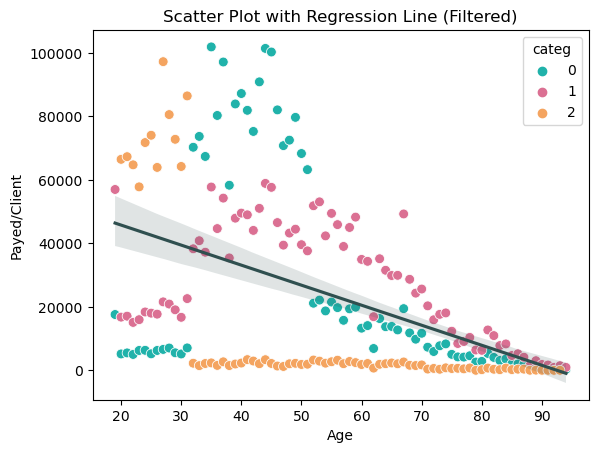

In [61]:
# Create scatter plot with regression line. I had to add hue argument to show categories
sns.scatterplot(x=revenue_per_age2['age'], y=revenue_per_age2['total_spent'], hue=revenue_per_age2['categ'], s=50, palette= palette)
sns.regplot(x=revenue_per_age2['age'], y=revenue_per_age2['total_spent'], scatter=False, line_kws={'color': 'darkslategray'})
plt.xlabel('Age')
plt.ylabel('Payed/Client')
plt.title('Scatter Plot with Regression Line (Filtered)')
plt.show()

# 19 year Category 2 purchases

In this section I will just further dig into the high revenue specifically from the 19 year old age group for category 2.

In [62]:
filtered_data = data2[(data2['age'] == 19) & (data2['categ'] == '2')]
filtered_data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,price_range
1316,c_1046,m,2004,2_39,2021-04-30 08:12:35.938139,s_27859,57.99,2,19,"(55.0, 60.0]"
1326,c_1046,m,2004,2_203,2021-10-10 06:26:20.484292,s_102634,136.99,2,19,NaN
1332,c_1046,m,2004,2_184,2021-10-10 07:34:47.183635,s_102634,49.61,2,19,"(45.0, 50.0]"
2158,c_3081,m,2004,2_162,2021-10-29 07:47:58.278995,s_111701,102.82,2,19,NaN
2161,c_3081,m,2004,2_96,2021-10-23 14:22:18.041192,s_109001,47.91,2,19,"(45.0, 50.0]"


In [63]:
#How many purchases were there above 200 euros?
filtered_data[filtered_data['price'] >= 200]['client_id'].nunique()

62

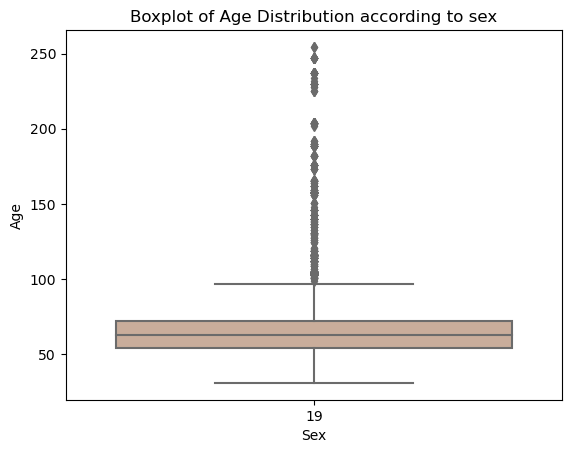

In [64]:
#How are purchases distributed?
sns.boxplot(x='age', y='price', data=filtered_data, palette = 'pink')
plt.title('Boxplot of Age Distribution according to sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

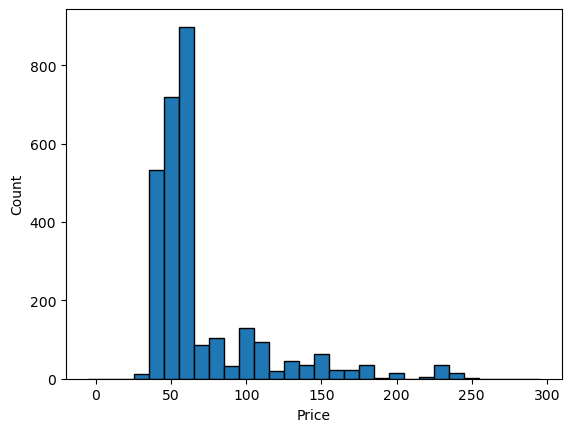

In [65]:
#Barchart
price_ranges = np.arange(0, 310, 10)

# Create bins for the price ranges
bins = pd.cut(filtered_data['price'], bins=price_ranges)

# Group the data by the price ranges and count the number of occurrences in each range
count_per_range = filtered_data.groupby(bins).size()

# Plot the bar graph
plt.bar(price_ranges[:-1], count_per_range, width=10, edgecolor='black')

# Set labels for the axes
plt.xlabel('Price')
plt.ylabel('Count')

# Show the plot
plt.show()

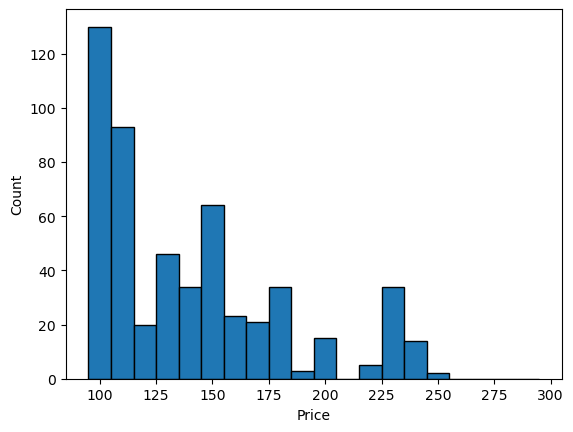

In [66]:
#Let's zoom in, we can see there is an up-tick of purchases for products ranging from 220-260.

price_ranges = np.arange(100, 310, 10)

# Create bins for the price ranges
bins = pd.cut(filtered_data['price'], bins=price_ranges)

# Group the data by the price ranges and count the number of occurrences in each range
count_per_range = filtered_data.groupby(bins).size()

# Plot the bar graph
plt.bar(price_ranges[:-1], count_per_range, width=10, edgecolor='black')

# Set labels for the axes
plt.xlabel('Price')
plt.ylabel('Count')

# Show the plot
plt.show()